# Occupancy of Squares in Game of Chess
## Problem Statement
Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. The dataset 'games.csv' collects all of the information available from 20,000 games. The aim is to analyse the occupancy of each square on the chess board so as the predict the most important squares in the game of Chess which might help the player to win the game.

## We will explore the problem in following stages:
1. Data Exploration - checking which data is useful from the file
2. Data Cleaning – imputing missing values in the data
3. Feature Engineering – extract moves from each game
4. Model Building – making predictive models on the data

## Dataset description

    Game ID;
    Rated (T/F);
    Start Time;
    End Time;
    Number of Turns;
    Game Status;
    Winner;
    Time Increment;
    White Player ID;
    White Player Rating;
    Black Player ID;
    Black Player Rating;
    All Moves in Standard Chess Notation;
    Opening Eco;
    Opening Name;
    Opening Ply (Number of moves in the opening phase);


## Steps involved :
1. extract moves from each game
2. turn move string into a new column
3. extract occupied squares from moves in each game
4. build a dictionary and store frequency of square occupied as values (normalized)
5. draw a board and visualize data

### Import the necessary libraries

In [3]:
#importing the necessary packages to process or plot the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import matplotlib

### Read and see the csv file

In [5]:
# using the head function see what is originlly present in the dataset
chess = pd.read_csv('games.csv')
chess.head()

id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3  
3  Queen's Pawn Game: Zukertort Variation            3  
4                        Philidor Defense            5

### Shape of the dataset

In [22]:
print (" shape of dataset:")
chess.shape

 shape of dataset:


(20058, 16)

### Size of the dataset

In [23]:
print (" size of dataset:")
chess.size

 size of dataset:


320928

### To check the null values in the dataset

In [20]:
chess.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

### Description of all particular column of the dataset

In [24]:
chess.describe(include='all')

id  rated    created_at  last_move_at         turns  \
count      20058  20058  2.005800e+04  2.005800e+04  20058.000000   
unique     19113      2           NaN           NaN           NaN   
top     XRuQPSzH   True           NaN           NaN           NaN   
freq           5  16155           NaN           NaN           NaN   
mean         NaN    NaN  1.483617e+12  1.483618e+12     60.465999   
std          NaN    NaN  2.850151e+10  2.850140e+10     33.570585   
min          NaN    NaN  1.376772e+12  1.376772e+12      1.000000   
25%          NaN    NaN  1.477548e+12  1.477548e+12     37.000000   
50%          NaN    NaN  1.496010e+12  1.496010e+12     55.000000   
75%          NaN    NaN  1.503170e+12  1.503170e+12     79.000000   
max          NaN    NaN  1.504493e+12  1.504494e+12    349.000000   

       victory_status winner increment_code white_id  white_rating black_id  \
count           20058  20058          20058    20058  20058.000000    20058   
unique              4      3            400     9438           NaN     9331   
top            resign  white           10+0  taranga           NaN  taranga   
freq            11147  10001           7721       72           NaN       82   
mean              NaN    NaN            NaN      NaN   1596.631868      NaN   
std               NaN    NaN            NaN      NaN    291.253376      NaN   
min               NaN    NaN            NaN      NaN    784.000000      NaN   
25%               NaN    NaN            NaN      NaN   1398.000000      NaN   
50%               NaN    NaN            NaN      NaN   1567.000000      NaN   
75%               NaN    NaN            NaN      NaN   1793.000000      NaN   
max               NaN    NaN            NaN      NaN   2700.000000      NaN   

        black_rating  moves opening_eco          opening_name   opening_ply  
count   20058.000000  20058       20058                 20058  20058.000000  
unique           NaN  18920         365                  1477           NaN  
top              NaN  e4 e5         A00  Van't Kruijs Opening           NaN  
freq             NaN     27        1007                   368           NaN  
mean     1588.831987    NaN         NaN                   NaN      4.816981  
std       291.036126    NaN         NaN                   NaN      2.797152  
min       789.000000    NaN         NaN                   NaN      1.000000  
25%      1391.000000    NaN         NaN                   NaN      3.000000  
50%      1562.000000    NaN         NaN                   NaN      4.000000  
75%      1784.000000    NaN         NaN                   NaN      6.000000  
max      2723.000000    NaN         NaN                   NaN     28.000000

### To see the  datatypes  or size of columns information of the dataset use .info() 

In [25]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


### Extracting the moves column

In [7]:
# extract moves from each game
chess_moves = chess[['moves']].copy()
chess_moves.head()

moves
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...

### Separating each move

In [8]:
# turn move string into a new column each_move
def each_move(chess_moves):
    each = (chess_moves['moves']).split(' ')

    return each
chess_moves['each_move'] = chess_moves.apply(each_move, axis=1)
chess_moves.head()

moves  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

                                           each_move  
0  [d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...  
1  [d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...  
2  [e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...  
3  [d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...  
4  [e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...

###  Looking for the Square Occupied in each move
1. Defining a function squares
2. Defining a array squares
3. For each move (stored in m) we are extracting the square occupied
4. Defining Squares Occupied during Casteling on both sides
5. Defining the square for other special notation in Chess
6. Finally storing the square in 'square' cloumn

##### All the chess notations are provided in readme.md file

In [13]:
# extract occupied squares from moves in each game
def square(chess_moves):
    squares = []
    for m in chess_moves['each_move']:
        if m == 'O-O' or m == 'O-O+':
            
            # Defining for White
            if chess_moves['each_move'].index(m)%2 == 0:
                squares.append('g1')
                squares.append('f1')
            # Defining for Black
            elif chess_moves['each_move'].index(m)%2 == 1:
                squares.append('g8')
                squares.append('f8')            
        elif m == 'O-O-O' or m =='O-O-O+':
            if chess_moves['each_move'].index(m)%2 == 0:
                squares.append('c1')
                squares.append('d1')
            elif chess_moves['each_move'].index(m)%2 == 1:
                squares.append('c8')
                squares.append('d8')             
        
        # For other notations this statement keeps last two items of the move representation (cxd5 = d5)
        else:
            if '=' in m:
                squares.append(m.split('=')[0][-2:])
            elif m[-1] == '+' or m[-1] =='#':
                squares.append(m[-3:-1])           
            else:
                squares.append(m[-2:])

    return squares
chess_moves['square'] = chess_moves.apply(square, axis=1)
chess_moves.head()

moves  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

                                           each_move  \
0  [d4, d5, c4, c6, cxd5, e6, dxe6, fxe6, Nf3, Bb...   
1  [d4, Nc6, e4, e5, f4, f6, dxe5, fxe5, fxe5, Nx...   
2  [e4, e5, d3, d6, Be3, c6, Be2, b5, Nd2, a5, a4...   
3  [d4, d5, Nf3, Bf5, Nc3, Nf6, Bf4, Ng4, e3, Nc6...   
4  [e4, e5, Nf3, d6, d4, Nc6, d5, Nb4, a3, Na6, N...   

                                              square  
0  [d4, d5, c4, c6, d5, e6, e6, e6, f3, b4, c3, a...  
1  [d4, c6, e4, e5, f4, f6, e5, e5, e5, e5, d4, c...  
2  [e4, e5, d3, d6, e3, c6, e2, b5, d2, a5, a4, c...  
3  [d4, d5, f3, f5, c3, f6, f4, g4, e3, c6, e2, d...  
4  [e4, e5, f3, d6, d4, c6, d5, b4, a3, a6, c3, e...

### Storing the frequency of each square to sq_count

In [14]:
# build a dictionary and store frequency of square occupied as values (normalized)
sq_count = {}
for s in chess_moves['square']:
    for i in s:
        sq_count[i] = sq_count.get(i, 0) + 1

### Normalising the frequency values in range of [0,1] for each square

In [15]:
# normalize value
def normalize(d, target=1.0):
   raw = sum(d.values())
   factor = target/raw
   return {key:round(value*factor*100,2) for key,value in d.items()}
sq_norm = normalize(sq_count)
sq_norm

{'d4': 3.92,
 'd5': 3.79,
 'c4': 2.48,
 'c6': 3.09,
 'e6': 2.23,
 'f3': 3.5,
 'b4': 1.73,
 'c3': 2.97,
 'a5': 1.13,
 'f4': 2.02,
 'e4': 3.56,
 'e5': 3.78,
 'f6': 3.44,
 'd3': 2.01,
 'd6': 2.18,
 'e3': 1.89,
 'e2': 1.71,
 'b5': 1.91,
 'd2': 1.75,
 'a4': 1.12,
 'c5': 2.31,
 'a6': 1.15,
 'a3': 1.04,
 'a8': 0.39,
 'e7': 2.0,
 'f8': 1.61,
 'g6': 1.51,
 'g7': 1.04,
 'h6': 1.29,
 'f7': 1.01,
 'h8': 0.47,
 'h5': 1.23,
 'g5': 2.1,
 'h7': 0.53,
 'f5': 1.92,
 'g4': 1.94,
 'd1': 1.3,
 'd7': 1.89,
 'g1': 1.58,
 'f1': 1.88,
 'c8': 0.94,
 'd8': 1.31,
 'c1': 0.92,
 'a2': 0.42,
 'a1': 0.37,
 'a7': 0.42,
 'b8': 0.59,
 'c2': 0.9,
 'c7': 0.94,
 'e8': 1.13,
 'h4': 1.2,
 'g3': 1.39,
 'g8': 1.3,
 'h3': 1.18,
 'f2': 0.89,
 'b7': 0.83,
 'g2': 0.82,
 'b6': 1.25,
 'b3': 1.27,
 'e1': 1.19,
 'h2': 0.52,
 'h1': 0.45,
 'b1': 0.6,
 'b2': 0.75}

### Making a list of all the square representation 

In [17]:
# turn dictionary values into lists, for data visualization in next steps
letter = ['a','b','c','d','e','f','g','h']
eight = []
for k in letter: 
    eight.append(sq_norm[k+'8'])
    
sev = []
for k in letter: 
    sev.append(sq_norm[k+'7'])
    
six = []
for k in letter: 
    six.append(sq_norm[k+'6'])
    
fiv = []
for k in letter: 
    fiv.append(sq_norm[k+'5'])
    
four = []
for k in letter: 
    four.append(sq_norm[k+'4'])
    
thr = []
for k in letter: 
    thr.append(sq_norm[k+'3'])
    
two = []
for k in letter: 
    two.append(sq_norm[k+'2'])
    
one = []
for k in letter: 
    one.append(sq_norm[k+'1'])

### Visualising  the board with the freauency

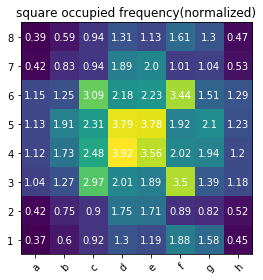

In [19]:
# draw a board and visualize data
number = ["8","7", "6", "5", "4",
              "3", "2", "1"]
alphabet = ["a", "b", "c",
           "d", "e", "f", "g","h"]
board = np.array([eight,sev,six,fiv,four,thr,two,one])


fig, ax = plt.subplots()
im = ax.imshow(board)

# We want to show all ticks...
ax.set_xticks(np.arange(len(alphabet)))
ax.set_yticks(np.arange(len(number)))
# ... and label them with the respective list entries
ax.set_xticklabels(alphabet)
ax.set_yticklabels(number)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(number)):
    for j in range(len(alphabet)):
        text = ax.text(j, i, board[i, j], ha="center", va="center", color="w")

ax.set_title("square occupied frequency(normalized)")
fig.tight_layout()
plt.show()

## Conclusion
From the plot we can see that the the four middle squared (d4, d5, e4 and e5) are the most Occupied and Active squared during the game of chess.